Navid Azadegan 

In [272]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly

pd.options.display.max_rows=500 #pd.set_option('display.max_rows', 500 )

%matplotlib inline


Data Gathering

In [273]:
data_path1='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_path2='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
data_path3='file:///C:/Users/navid/covid/data/raw2/COVID-19/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'
pd_raw1=pd.read_csv(data_path1) #covid cases
pd_raw2=pd.read_csv(data_path2) #Country Population
pd_raw3=pd.read_csv(data_path3) #Vaccine data
data_path4='C:/Users/navid/covid/data/processed/saved_covid.csv'#processed raw1

Data Preparation

In [274]:
Time_indx=pd_raw1.columns[4:]
Time_indx3=pd_raw3.columns[12:]

In [275]:
df_plot=pd.DataFrame({'data':Time_indx})
df_plot3=pd.DataFrame({'data':Time_indx3})


#df_plot3.head()
#pd_raw['Country/Region'].unique()
#df_plot3

In [276]:
Country_list=['Iran',
              'Germany',
              'US']

In [277]:
for each in Country_list:
   df_plot3[each]=np.array(pd_raw3[pd_raw3['Country_Region']==each].iloc[:,12::].sum(axis=0))

In [278]:
for each in Country_list:
    Country_Population=max(pd_raw2[pd_raw2['Country_Region']==each].Population)
    df_plot[each]=np.array(pd_raw1[pd_raw1['Country/Region']==each].iloc[:,4::].sum(axis=0)/Country_Population)
  

In [279]:
df_plot.head()

,data,Iran,Germany,US
0,1/22/20,0.0,0.0,3.035212e-09
1,1/23/20,0.0,0.0,3.035212e-09
2,1/24/20,0.0,0.0,6.070424e-09
3,1/25/20,0.0,0.0,6.070424e-09
4,1/26/20,0.0,0.0,1.517606e-08


<AxesSubplot:xlabel='data'>

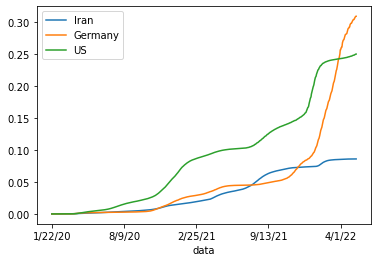

In [280]:

df_plot.set_index('data').plot()

In [281]:
df_plot3.head()

,data,Iran,Germany,US
0,2020-12-12,0.0,0.0,0.0
1,2020-12-13,0.0,0.0,0.0
2,2020-12-14,0.0,0.0,50.0
3,2020-12-15,0.0,0.0,1058.0
4,2020-12-16,0.0,0.0,12835.0


<AxesSubplot:xlabel='data'>

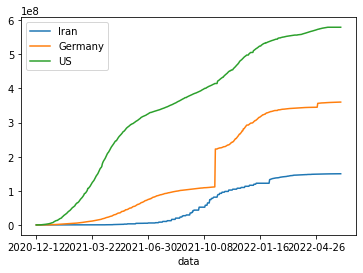

In [282]:
df_plot3.set_index('data').plot()

Data Type (4.2)

In [283]:
datetime.strptime(df_plot.data[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [284]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.data]


In [285]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 


In [286]:
df_plot['data']=time_idx

In [287]:
df_plot.head()

,data,Iran,Germany,US
0,2020-01-22,0.0,0.0,3.035212e-09
1,2020-01-23,0.0,0.0,3.035212e-09
2,2020-01-24,0.0,0.0,6.070424e-09
3,2020-01-25,0.0,0.0,6.070424e-09
4,2020-01-26,0.0,0.0,1.517606e-08


-------------------------------------------------------------------------------Saving Data--------------------------------------------

In [288]:
df_plot.to_csv(data_path4, index= False)

Data Arragging (5.1)

In [289]:
pd_data_base=pd_raw1.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base=pd_data_base.drop(['Lat', 'Long'], axis=1)

In [244]:
pd_data_base

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,178905,178919,178922,178981,179010,179017,179131,179169,179203,179242
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275266,275310,275341,275366,275372,275416,275440,275485,275534,275574
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265786,265791,265794,265798,265800,265804,265806,265808,265814,265816
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,41717,42156,42156,42156
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
5,NaN,Antarctica,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,7663,7663,7663,7663,7663,7663,7721,7721,7721,7721
7,NaN,Argentina,0,0,0,0,0,0,0,0,...,9083673,9083673,9083673,9101319,9101319,9101319,9101319,9101319,9101319,9101319
8,NaN,Armenia,0,0,0,0,0,0,0,0,...,422877,422877,422877,422877,422896,422896,422900,422900,422900,422900
9,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,109879,110846,111599,112407,113368,114564,115688,116905,117882,118728


In [245]:
pd_data_base.set_index(['state','country'])

1/22/20  \
state                                        country                                     
NaN                                          Afghanistan                             0   
                                             Albania                                 0   
                                             Algeria                                 0   
                                             Andorra                                 0   
                                             Angola                                  0   
                                             Antarctica                              0   
                                             Antigua and Barbuda                     0   
                                             Argentina                               0   
                                             Armenia                                 0   
Australian Capital Territory                 Australia                               0   
New South Wales                              Australia                               0   
Northern Territory                           Australia                               0   
Queensland                                   Australia                               0   
South Australia                              Australia                               0   
Tasmania                                     Australia                               0   
Victoria                                     Australia                               0   
Western Australia                            Australia                               0   
NaN                                          Austria                                 0   
                                             Azerbaijan                              0   
                                             Bahamas                                 0   
                                             Bahrain                                 0   
                                             Bangladesh                              0   
                                             Barbados                                0   
                                             Belarus                                 0   
                                             Belgium                                 0   
                                             Belize                                  0   
                                             Benin                                   0   
                                             Bhutan                                  0   
                                             Bolivia                                 0   
                                             Bosnia and Herzegovina                  0   
                                             Botswana                                0   
                                             Brazil                                  0   
                                             Brunei                                  0   
                                             Bulgaria                                0   
                                             Burkina Faso                            0   
                                             Burma                                   0   
                                             Burundi                                 0   
                                             Cabo Verde                              0   
                                             Cambodia                                0   
                                             Cameroon                                0   
Alberta                                      Canada                                  0   
British Columbia                             Canada                                  0   
Diamond Princess                             Canada                                  0   
Grand Princess               

In [246]:
pd_data_base.set_index(['state','country']).T

state           NaN                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   
...             ...     ...     ...     ...    ...        ...   
5/10/22      179017  275416  265804   41717  99287         11   
5/11/22      179131  275440  265806   41717  99287         11   
5/12/22      179169  275485  265808   42156  99287         11   
5/13/22      179203  275534  265814   42156  99287         11   
5/14/22      179242  275574  265816   42156  99287         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
5/10/22                7663   9101319  422896                       114564   
5/11/22                7721   9101319  422900                       115688   
5/12/22                7721   9101319  422900                       116905   
5/13/22                7721   9101319  422900                       117882   
5/14/22                7721   9101319  422900                       118728   

state    ...     NaN                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
5/10/22  ...  902540     238743    8063    522749  10681214   
5/11/22  ...  902540     238747    8117    522840  10683972   
5/12/22  ...  902540     238767    8194    522840  10690471   
5/13/22  ...  902540     238778    8289    522921  10693141   
5/14/22  ...  902540     238788    8383    522921  10695036   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
5/10/22             657193                  535  11819  320226   248642  
5/11/22             657193                  535  11819  320303   248642  
5/12/22             657193                  535  11819  320412   248943  
5/13/22             657193                  535  11819  320481   249131  
5/14/22             657193                  535  11819  320591   249206  

[844 rows x 285 columns]

In [247]:
test_pd=pd_data_base.set_index(['state','country']).T

In [248]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [249]:
test_pd.stack(level=(0,1))

         state              country    
1/22/20  NaN                Afghanistan         0.0
                            Albania             0.0
                            Algeria             0.0
                            Andorra             0.0
                            Angola              0.0
                                             ...   
5/14/22  Western Australia  Australia      548467.0
         Xinjiang           China            1008.0
         Yukon              Canada           4318.0
         Yunnan             China            2127.0
         Zhejiang           China            3130.0
Length: 240540, dtype: float64

In [250]:
pd_relational_model=test_pd.stack(level=(0,1)).reset_index()

In [251]:
pd_relational_model

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
240535,5/14/22,Western Australia,Australia,548467.0
240536,5/14/22,Xinjiang,China,1008.0
240537,5/14/22,Yukon,Canada,4318.0
240538,5/14/22,Yunnan,China,2127.0


In [252]:
pd_relational_model=pd_relational_model.rename(columns={'level_0':'date', 0:'confirmed'})

In [253]:
pd_relational_model

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
240535,5/14/22,Western Australia,Australia,548467.0
240536,5/14/22,Xinjiang,China,1008.0
240537,5/14/22,Yukon,Canada,4318.0
240538,5/14/22,Yunnan,China,2127.0


In [254]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [255]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [256]:
pd_relational_model

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,NaN,Albania,0.0
2,2020-01-22,NaN,Algeria,0.0
3,2020-01-22,NaN,Andorra,0.0
4,2020-01-22,NaN,Angola,0.0
...,...,...,...,...
240535,2022-05-14,Western Australia,Australia,548467.0
240536,2022-05-14,Xinjiang,China,1008.0
240537,2022-05-14,Yukon,Canada,4318.0
240538,2022-05-14,Yunnan,China,2127.0


---------------------------------------------------------------------------------processed data saved

In [257]:
pd_relational_model.to_csv('C:/Users/navid/covid/data/processed/covid_confirmed.csv',index=False)

In [258]:
df_plot3

,data,Iran,Germany,China
0,2020-12-12,0.0,0.0,0.000000e+00
1,2020-12-13,0.0,0.0,0.000000e+00
2,2020-12-14,0.0,0.0,1.500000e+06
3,2020-12-15,0.0,0.0,1.500000e+06
4,2020-12-16,0.0,0.0,1.500000e+06
...,...,...,...,...
540,2022-06-05,149957751.0,359847574.0,3.566789e+09
541,2022-06-06,149957751.0,359856002.0,3.566817e+09
542,2022-06-07,149957751.0,359926499.0,3.566839e+09
543,2022-06-08,149957751.0,360010290.0,3.416051e+09


In [259]:
df_plot4=pd.read_csv(data_path4)

In [260]:
df_plot4


,data,Iran,Germany,China
0,2020-01-22,0.000000,0.000000,3.881628e-07
1,2020-01-23,0.000000,0.000000,4.554538e-07
2,2020-01-24,0.000000,0.000000,6.516602e-07
3,2020-01-25,0.000000,0.000000,9.959068e-07
4,2020-01-26,0.000000,0.000000,1.469777e-06
...,...,...,...,...
839,2022-05-10,0.086034,0.306703,1.645116e-03
840,2022-05-11,0.086039,0.307773,1.650684e-03
841,2022-05-12,0.086043,0.308602,1.656178e-03
842,2022-05-13,0.086048,0.309346,1.661379e-03


Ploting (5.2)

In [261]:
import plotly.express as px
fig = px.scatter(x=[1, 2 , 3 , 4 , 5], y=[0, 1, 4, 9, 16])
fig.show()